In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
dataset = pd.read_csv("gebrauchtwagen.csv")
dataset.head()

,km,yearto2019,owner,price
0,36599,7,1,6190
1,57000,6,2,6900
2,102350,3,1,7222
3,65300,5,1,7500
4,28053,4,1,7749


In [84]:
X = dataset.iloc[:, 0:1].values
y = dataset.iloc[:, 3].values
y

array([ 6190,  6900,  7222,  7500,  7749,  7912,  8490,  8690,  8760,
       10490, 10800, 10850, 10890, 11890, 11990, 12530, 13740, 12745,
       15870, 15885, 15990, 15990, 16270, 16680, 18970,  4980,  5980,
        6510,  6775,  6800], dtype=int64)

                  km  yearto2019      owner         price
count      30.000000   30.000000  30.000000     30.000000
mean    29529.633333    1.900000   1.133333  10734.600000
std     28415.490457    2.233754   0.345746   3957.286118
min         7.000000    0.000000   1.000000   4980.000000
25%      6192.750000    0.000000   1.000000   7291.500000
50%     17106.000000    1.000000   1.000000  10645.000000
75%     51592.750000    3.750000   1.000000  13491.250000
max    102350.000000    7.000000   2.000000  18970.000000


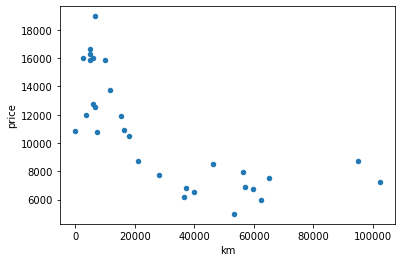

In [85]:
print(dataset.describe());
dataset.plot.scatter(x='km', y='price')
plt.show()

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [87]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [88]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slopes/coefficients
print(regressor.coef_)

13793.193944137904
[-0.1012532]


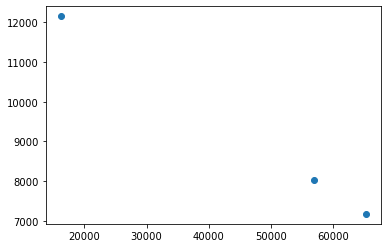

In [90]:
# predict test set
y_pred = regressor.predict(X_test)
plt.scatter(X_test, y_pred)

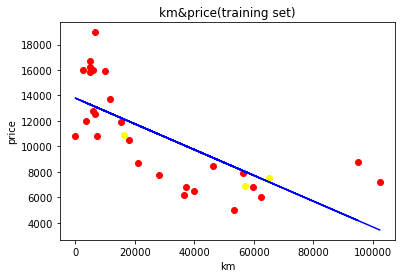

In [91]:
# Visualize the training set, test set, and result
plt.scatter(X_train,y_train,color = 'red')
plt.scatter(X_test,y_test,color = 'yellow')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('km&price(training set)')
plt.xlabel('km')
plt.ylabel('price')
plt.show()


In [92]:
#Model evaluation
# print the R-squared value for the model
print('R Score = ' + str(regressor.score(X, y)))

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R Score = 0.529531539512909
Mean Absolute Error: 898.6678154158084
Mean Squared Error: 978805.5621458553
Root Mean Squared Error: 989.3460275079975


In [95]:
X = dataset.iloc[:,0:1].values
y = dataset.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [96]:
from sklearn.linear_model import Ridge
regressor = Ridge(alpha = 0.1)
regressor.fit(X_train, y_train)


from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
regressor = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
regressor.fit(X_train, y_train)

#prediction of new value
y_pred = regressor.predict(X_test)
print(regressor.score(X, y))


0.5282752848834118


In [97]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)
print(regressor.score(X, y))


0.9248277456965267


In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.1, random_state = 0)
poly_reg.fit(X_poly_train, y_train)


# the code to compare the results of polynomial regression to linear regression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly_train, y_train)

# Predict test set result
y_pred = lin_reg_2.predict(X_poly_test)
print(r2_score(y_test,y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.20980024448523693
Mean Absolute Error: 1446.7161887095833
Mean Squared Error: 4227854.744315479
Root Mean Squared Error: 2056.174784476135


In [111]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#regressor = DecisionTreeRegressor(min_samples_split  = 10)
regressor = DecisionTreeRegressor(min_samples_leaf  = 1)

regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print(regressor.score(X, y))





0.984024608886224


In [112]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1263.3333333333333
Mean Squared Error: 2309016.6666666665
Root Mean Squared Error: 1519.5448880064935
